#📌 Extracción

In [15]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

In [17]:
from pandas import json_normalize

df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [18]:
df_normalizado.head(30)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


**Acciones más comunes**

*   Duplicados
*   Valores vacíos
*   Valores nulos
*   Tipos de datos
*   Valores atípicos
*   Consistencia y validez de datos categóricos
*   Normalización de textos

In [19]:
# Verifique si hay valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [20]:
# Verificando si hay duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

# Verificando se hay valores Nulos
valores_nulos = df_normalizado.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Numero de lineas duplicadas: 0

Valores nulos por columna:
[]


In [21]:
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [23]:
#Cambiando la columna "account.Charges.Total" a Float

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)



float64


In [24]:
# Eliminando las columnas de Churn

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [27]:
# Vacíos o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [28]:
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

                 account.Charges.Monthly  Cuentas_Diarias
0                                  65.60         2.186667
1                                  59.90         1.996667
2                                  73.90         2.463333
3                                  98.00         3.266667
4                                  83.90         2.796667
...                                  ...              ...
7263                               85.10         2.836667
7264                               50.30         1.676667
7265                               67.85         2.261667
7266                               59.00         1.966667
Cuentas_Diarias                      NaN              NaN

[7044 rows x 2 columns]


In [32]:
df_normalizado = df_normalizado.drop('Cuentas_Diarias', errors='ignore')

In [33]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0.0,No,No,13.0,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0.0,Yes,No,22.0,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0.0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0.0,Yes,Yes,67.0,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [39]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

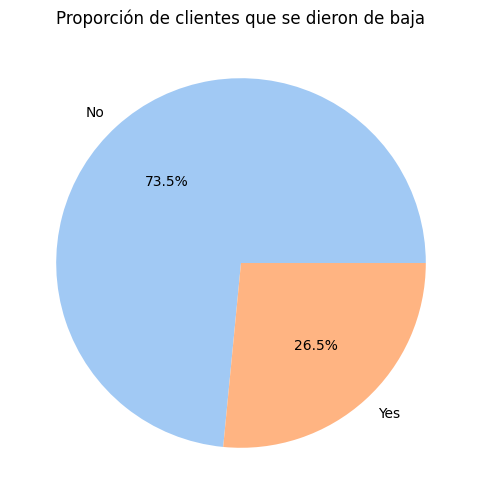

In [42]:
churn_counts = df_normalizado['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proporción de clientes que se dieron de baja")
plt.show()

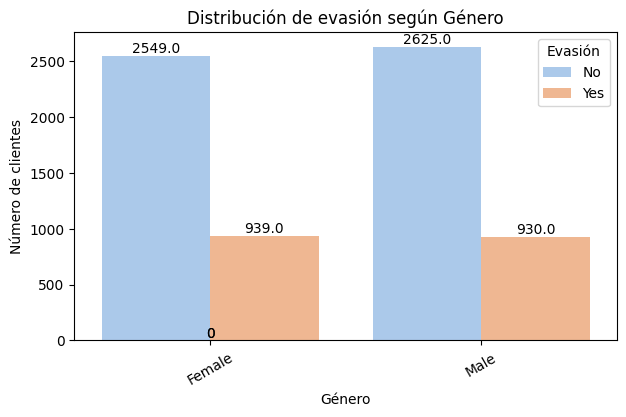

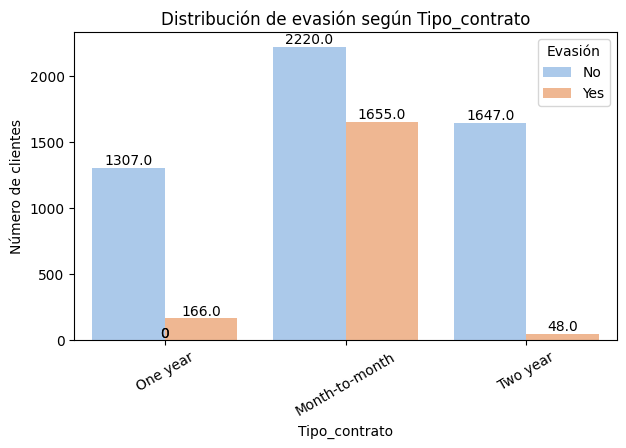

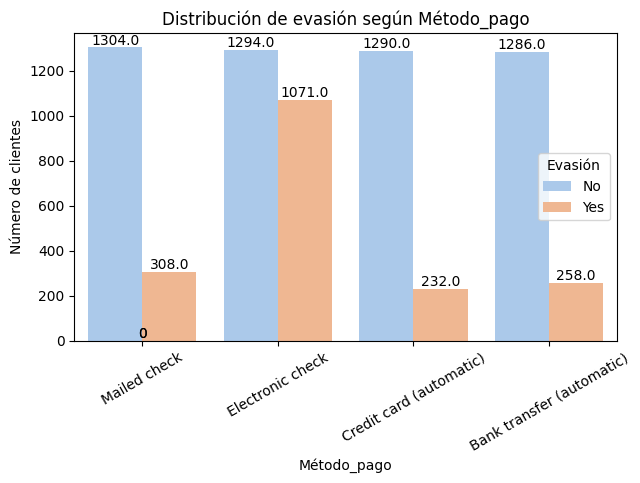

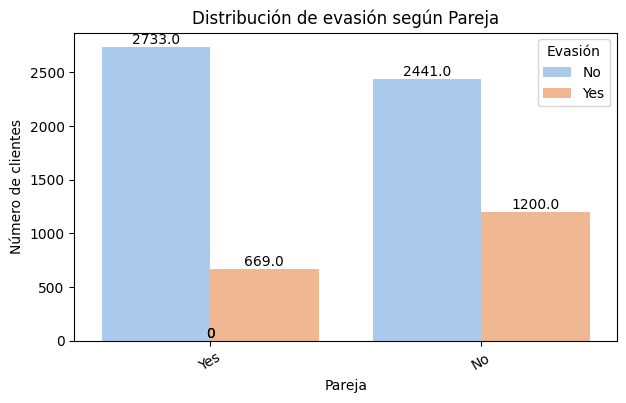

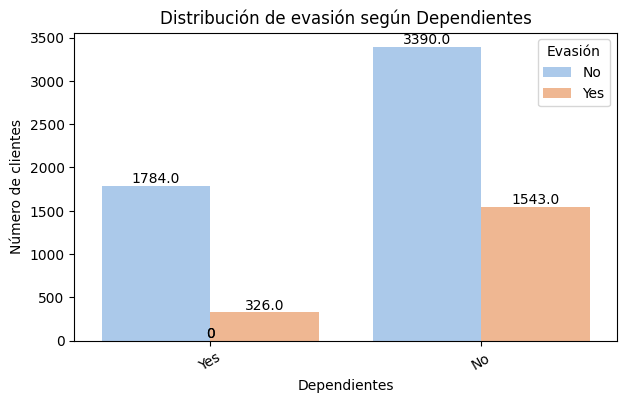

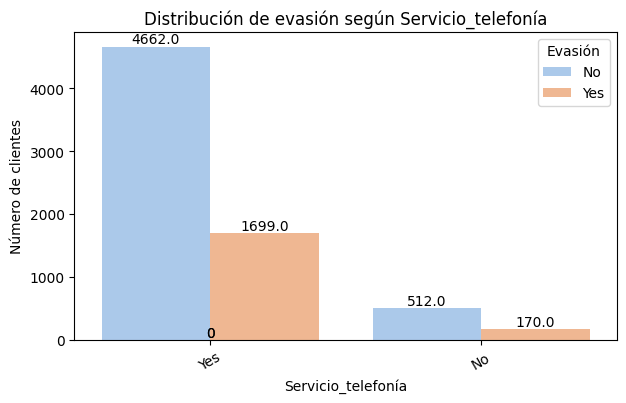

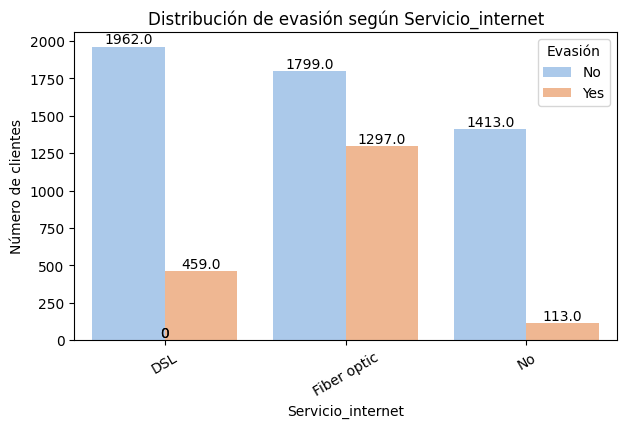

In [46]:
# Diccionario de nombres traducidos
nuevos_nombres = {
    'customer.gender': 'Género',
    'account.Contract': 'Tipo_contrato',
    'account.PaymentMethod': 'Método_pago',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'phone.PhoneService': 'Servicio_telefonía',
    'internet.InternetService': 'Servicio_internet',
    'Churn': 'Evasión'
}

# Renombrar
df_es = df_normalizado.rename(columns=nuevos_nombres)

# Variables categóricas en español
categoricas = list(nuevos_nombres.values())
categoricas.remove('Evasión')

# Gráficas con valores encima
for col in categoricas:
    plt.figure(figsize=(7,4))
    ax = sns.countplot(data=df_es, x=col, hue='Evasión', palette="pastel")

    # Agregar valores encima de las barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribución de evasión según {col}")
    plt.ylabel("Número de clientes")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.legend(title="Evasión")
    plt.show()

/tmp/ipython-input-730288604.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




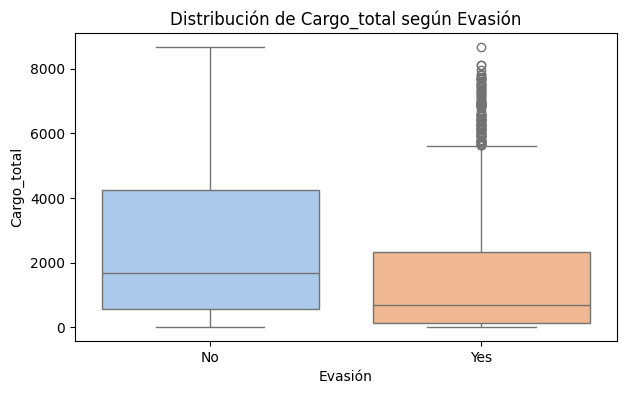

/tmp/ipython-input-730288604.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




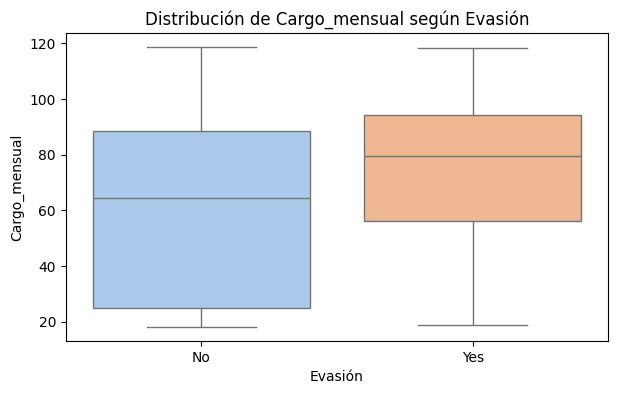

/tmp/ipython-input-730288604.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




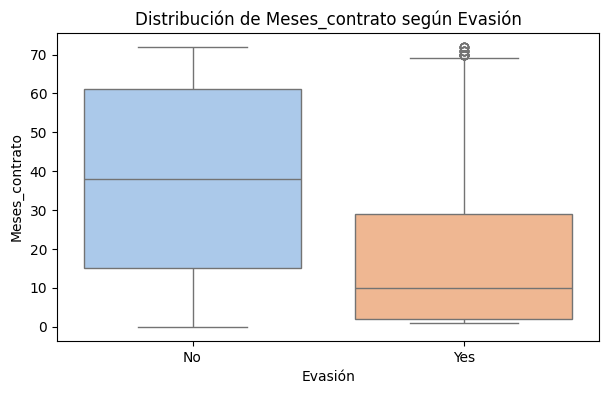

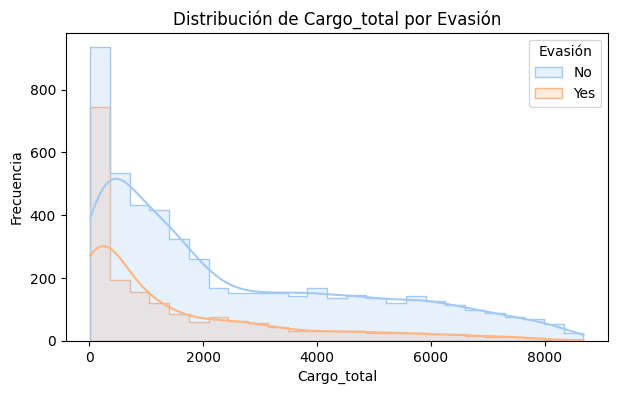

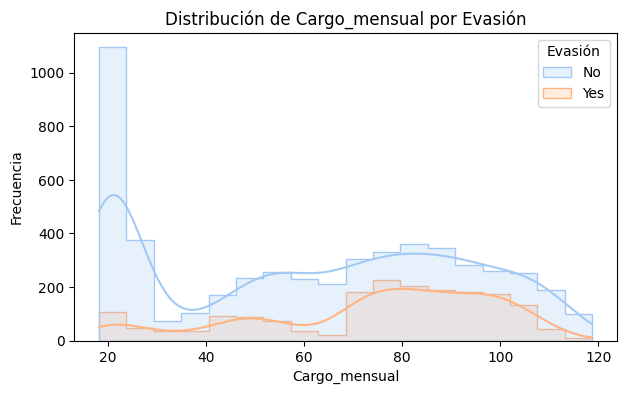

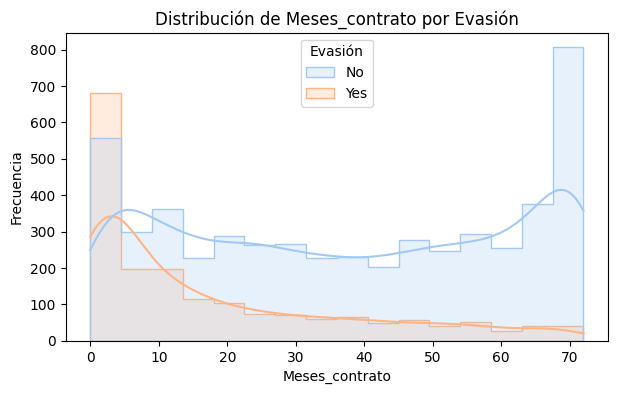

In [47]:
# Renombramos solo las numéricas relevantes y la target
nuevos_nombres_num = {
    'account.Charges.Total': 'Cargo_total',
    'account.Charges.Monthly': 'Cargo_mensual',
    'customer.tenure': 'Meses_contrato',
    'Churn': 'Evasión'
}

df_es = df_normalizado.rename(columns=nuevos_nombres_num)

# Variables numéricas a analizar
numericas = ['Cargo_total', 'Cargo_mensual', 'Meses_contrato']

# --- BOXPLOTS ---
for col in numericas:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df_es, x='Evasión', y=col, palette="pastel")
    plt.title(f"Distribución de {col} según Evasión")
    plt.ylabel(col)
    plt.xlabel("Evasión")
    plt.show()

# --- HISTOGRAMAS/KDE ---
for col in numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df_es, x=col, hue='Evasión', kde=True, element="step", palette="pastel")
    plt.title(f"Distribución de {col} por Evasión")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

#📄Informe final

## 🔹 Introducción
Este proyecto aborda el **problema de evasión de clientes (Churn)** en **Telecom X**.  
El objetivo es **analizar el comportamiento de los clientes** para identificar los **principales impulsores del churn** y proponer **acciones de retención**. Los hallazgos servirán de base para que el equipo de Data Science construya **modelos predictivos** y diseñe **estrategias** que reduzcan la pérdida de clientes.

---

## 🔹 Análisis Exploratorio de Datos (EDA)
**Principales análisis y visualizaciones:**
- **Proporción de churn**: ~**26.5%** de clientes se dan de baja.
- **Género**: distribución de churn similar entre mujeres y hombres.
- **Tipo de contrato**: **Month-to-month** concentra la mayor tasa de churn; **One/Two year** muestran mayor fidelidad.
- **Método de pago**: **Electronic check** asociado a más churn; **pagos automáticos** a menos churn.
- **Pareja (Partner)**: los clientes **sin pareja** presentan mayor churn relativo.
- **Cargos**:  
  - **MonthlyCharges** altos → mayor probabilidad de churn (sensibilidad a precio).  
  - **TotalCharges** más altos en **no churn** (coherente con mayor permanencia).  
- **Tenure**: churn frecuente en clientes con **pocos meses**; disminuye con la antigüedad.

**Las figuras incluidas en el notebook (torta de proporciones, barras apiladas por categoría, boxplots e histogramas) respaldan estos patrones.**

---

## 🔹 Conclusiones e Insights
1. **Churn relevante (~26.5%)**: requiere foco inmediato de negocio.  
2. **Drivers principales**:  
   - **Contrato** (*month-to-month*) ↗️ riesgo.  
   - **Método de pago** (electronic check) ↗️ riesgo; **autopay** ↘️ riesgo.  
   - **Precio percibido**: **MonthlyCharges** altos ↗️ churn.  
   - **Antigüedad**: bajo **tenure** ↗️ churn.  
3. Segmentos útiles para acción: clientes **recién incorporados**, **sin pareja**, **senior**, **month-to-month** con **electronic check** y **cargos altos**.
